In [22]:
###########################################################################
#                                                                         #
#         Project 5: Social Media Data Analysis, with BlueSky             #
#                                                                         #
#                      Author : Stephen Bouchardon                        #
#                                                                         #
###########################################################################

"""

Modules

"""

from atproto import *
from dotenv import load_dotenv
from os import getenv, makedirs
import pandas as pd
from textblob import TextBlob
import re
from collections import Counter
import matplotlib.pyplot as plt
import datetime as dt


In [23]:
###########################################################################
#                                                                         #
# Pre-loading                                                             #
# Functions : loginClient, fetchPosts, getInfoPost                        #
#                                                                         #
###########################################################################

"""
Function: loginClient 

Logs in to the Bluesky social media using credentials from a .env file. 

Link documentation : https://docs.bsky.app/docs/get-started, https://docs.bsky.app/docs/starter-templates/bots

Parameters: None

Returns:
* client: Authenticated Bluesky session object
"""
def loginClient():

    load_dotenv() # load in the private credentials from .env file (email and password)

    bluesky_email = getenv("BLUESKY_EMAIL")
    bluesky_pwd = getenv("BLUESKY_PWD")

    client = Client() # login to the bluesky account via the api : atproto
    client.login(bluesky_email,bluesky_pwd)
    
    return client



"""
Function get_query: 

Use a regular expression in order to only accept short, alphabetical outputs.

Parameters: None

Returns:
* q : query used to search for the social media posts topic
"""
def get_query():
    pattern = re.compile(r'^[A-Za-z]{1,20}$')

    while True:
        q = input("Write down the topic you want to search: ")
        
        if pattern.fullmatch(q.strip()):
            return q
        else:
            print("Invalid input. Please use only 1 to 20 alphabetical characters.")



"""
Function: fetchPosts

Fetches targetted posts from Bluesky based on search parameters.

Link documentation : https://docs.bsky.app/docs/api/app-bsky-feed-search-posts

Parameters:
* client : Bluesky session object
* q: Search the string tag or hastag inside the text value of the post, format: "#{value}"
* sort: Ranking values by "latest" or "top"
* limit: Maximum number of posts retrieved, format: integer
* since: Starting date of search (inclusive), ISO format: "YYYY-MM-DDTHH:MM:SSZ"
* until: Ending date of search (exclusive), ISO format: "YYYY-MM-DDTHH:MM:SSZ"
* lang: Language of the search (e.g. "en", "fr")

Returns:
* df: Pandas DataFrame of post metadata (author, URI, text, timestamp)
"""
def fetchPosts(client, q="#football", sort="top",limit=100, since="2025-01-01T00:00:00Z", until="2025-06-01T00:00:00Z",lang="en"):
    # prepare a dictionnary to search the requested posts 
    search_params = {
        "q": q,  
        "sort": sort,
        "limit": limit, 
        "since" : since,
        "until" : until,
        "lang" : lang
    }

    # try to get the posts
    response = client.app.bsky.feed.search_posts(search_params)

    # get response 200 : client's request valid
    # from response, collect data in a list of dictionaries
    data = []

    for post in response.posts:
        post_record = post.record
        post_data = {
            "post_did": post.author.did,
            "post_uri": post.uri,
            "author": post.author.display_name,
            "handle": post.author.handle,
            "author_did": post.author.did,
            "text": post_record.text,
            "created_at": post_record.created_at
        }
        
        # add post values ( a dictionary ) to the list
        data.append(post_data)

    # convert list to DataFrame
    df = pd.DataFrame(data)

    return df


   
"""
Function: getInfoPost

Slice a DataFrame : accesses the i rows and j columns of a larger DataFrame.

Parameters:
* df: Pandas DataFrame
* i: Row index
* j: Column index

Returns:
* Subset of the DataFrame
"""
def getInfoPost(df,i,j):
    iMax, jMax = df.shape
    i = min(i, iMax - 1) # if the i index is greater than the row size of the DataFrame, retrieve the last row of the DataFrame instead
    j = min(j, jMax - 1)
    return df.iloc[i, j]



""" Test """

# connect to the Client with the BlueSky API
client = loginClient()

# Make sure the format is correct for the text query
query = get_query()

# Get the instant time in ISO Format for the following search date query in fetchPosts
untilTime = dt.datetime.now().replace(microsecond=0).isoformat() + 'Z'

df_posts = fetchPosts(client,q=query,sort="top",limit=100,since="2025-01-01T00:00:00Z",until=untilTime,lang="en")

df_posts


Write down the topic you want to search:  music


,post_did,post_uri,author,handle,author_did,text,created_at
0,did:plc:iuha5tn7bmd3pbnlptc6tehm,at://did:plc:iuha5tn7bmd3pbnlptc6tehm/app.bsky...,Alex Strook 🐭⚡️,alexstrook.bsky.social,did:plc:iuha5tn7bmd3pbnlptc6tehm,Funny guy,2025-06-25T02:13:13.944Z
1,did:plc:nq6hqsphjqkngdg2n6zoeci5,at://did:plc:nq6hqsphjqkngdg2n6zoeci5/app.bsky...,,bradspinsvinyl.bsky.social,did:plc:nq6hqsphjqkngdg2n6zoeci5,Album release anniversary today…\n\nReleased J...,2025-06-25T09:53:17.127Z
2,did:plc:fl35x35zapmihzlryltxnvnv,at://did:plc:fl35x35zapmihzlryltxnvnv/app.bsky...,isa 🔞 working on comms,babeyxiao.bsky.social,did:plc:fl35x35zapmihzlryltxnvnv,speedpaint (with music!),2025-06-25T04:44:56.366Z
3,did:plc:jd5ynkua4gin3r2fmb25marj,at://did:plc:jd5ynkua4gin3r2fmb25marj/app.bsky...,Black Aziz Anansi,blackazizanansi.bsky.social,did:plc:jd5ynkua4gin3r2fmb25marj,Music started sucking when kids stopped gettin...,2025-06-24T03:12:16.848Z
4,did:plc:3gqjc6lavbb2vr5q6d4vf2la,at://did:plc:3gqjc6lavbb2vr5q6d4vf2la/app.bsky...,puppysnackz (COMMS OPEN),puppysnackz.bsky.social,did:plc:3gqjc6lavbb2vr5q6d4vf2la,body jumpinnn…~\n\nMusic by angst! (angstypooh...,2025-06-23T23:09:44.532Z
...,...,...,...,...,...,...,...
95,did:plc:i5mdaf5woj7m2sfprnlibkcw,at://did:plc:i5mdaf5woj7m2sfprnlibkcw/app.bsky...,"Jim Stewartson, Antifascist",jim-stewartson.bsky.social,did:plc:i5mdaf5woj7m2sfprnlibkcw,I made a music video for myself and I can’t st...,2025-06-24T18:27:46.367Z
96,did:plc:w3e4smsygonlaqe7t2yhm6sw,at://did:plc:w3e4smsygonlaqe7t2yhm6sw/app.bsky...,verti,verti.blue,did:plc:w3e4smsygonlaqe7t2yhm6sw,This album is so good! Crazy that it came out ...,2025-06-26T01:12:28.156Z
97,did:plc:bhvpp7hwgeveika3umz2mppt,at://did:plc:bhvpp7hwgeveika3umz2mppt/app.bsky...,miles,milesmorkri.bsky.social,did:plc:bhvpp7hwgeveika3umz2mppt,the mario kart world OST is one of the greates...,2025-06-25T17:06:31.843Z
98,did:plc:chl3ze7gwguranppbmyhlj6f,at://did:plc:chl3ze7gwguranppbmyhlj6f/app.bsky...,Centuries of Sound,centuriesofsound.bsky.social,did:plc:chl3ze7gwguranppbmyhlj6f,I spent a month making a mix of the Worst Musi...,2025-06-25T10:51:33.744Z


,post_uri,polarity,category,likes
4,at://did:plc:3gqjc6lavbb2vr5q6d4vf2la/app.bsky...,1.000000,positive,50
19,at://did:plc:2jjromh55tf7pp7s4hsvurf4/app.bsky...,0.900000,positive,50
56,at://did:plc:3s5wtzqrvrsvbxl6afiko2yw/app.bsky...,0.833333,positive,50
71,at://did:plc:dcqu7njxhf7cixehpgcuzw7h/app.bsky...,0.750000,positive,50
18,at://did:plc:6l5p6cx7726udtcts2rw5sar/app.bsky...,0.700000,positive,50
...,...,...,...,...
78,at://did:plc:dxobbl5x3kdrmifurmhnu3jz/app.bsky...,0.000000,neutral,37
43,at://did:plc:svujbldczwmeixoiigddctms/app.bsky...,0.700000,positive,35
93,at://did:plc:jxeww66t2k5vwuvmxkjydrka/app.bsky...,-0.714286,negative,35
24,at://did:plc:psyv5khoyencj5bpra32qd2s/app.bsky...,0.000000,neutral,29


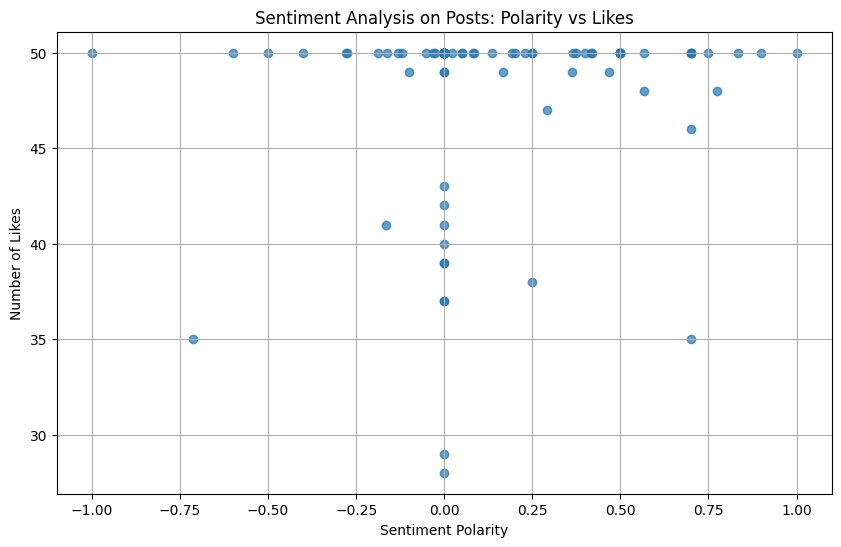

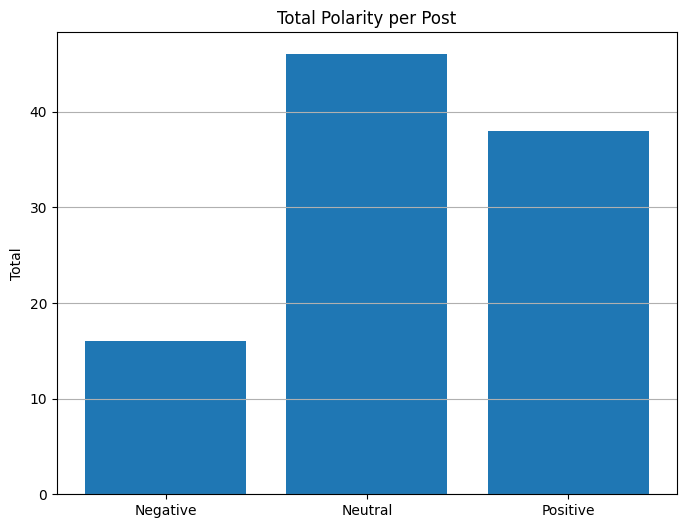

In [24]:
#################################################################################################
#                                                                                               #
# 1. Derive the sentiment of each post using Python modules (no need to create your Algorithm): #
# Functions : get_polarity, categorize_polarity, get_likes, get_sentimentAnalysis               #
#                                                                                               #
#################################################################################################

"""
Function: get_polarity

From the library TextBlob and its sentiment analysis tools, 
the function calculate the polarity score within the range [-1.0, 1.0]. 
A better score is positive and tends to 1.0. If worse, to -1.0.

Link documentation : https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis

Parameters:
* text : string of characters

Returns:
* Float value between -1.0 and 1.0
"""
def get_polarity(text):
    return TextBlob(text).sentiment.polarity



"""
Function: categorize_polarity

Categorizes a post into sentiment type based on their polarity score.

Parameters:
* p: Float value, the polarity score found for a post with the function get_polarity

Returns:
* "positive", "negative" or "neutral"
"""
def categorize_polarity(p):
    if p > 0:
        return 'positive'
    elif p < 0:
        return 'negative'
    else:
        return 'neutral'



"""
Function: get_likes

With the URI of a post, the client object retrieves the like records and find the number of likes.

Link documentation : https://docs.bsky.app/docs/api/app-bsky-feed-get-likes

Parameters:
* client : Bluesky session object
* uri : Unique identifier of the post

Returns:
* Integer value, number of likes
"""
def get_likes(client, uri):
    response = client.app.bsky.feed.get_likes({"uri": uri})
    return len(response.likes)



"""
Function: get_sentimentAnalysis

Apply the functions get_polarity & get_likes for a dataset of posts.
Create a new DataFrame with the id of the post and its sentimental scores.
Finally, sort the DataFrame by polarity and number of likes.

Parameters:
* client: Bluesky session object
* df: Pandas DataFrame of posts

Returns:
* returnedDf: Sorted DataFrame of post URI, polarity, category and likes
"""

def df_sentimentAnalysis(client, df):
    # initialisation of the new dataframe
    df_postAnalysis = pd.DataFrame()
    df_postAnalysis['post_uri'] = df['post_uri']
    df_postAnalysis['polarity'] = df['text'].apply(get_polarity)
    df_postAnalysis['category'] = df_postAnalysis['polarity'].apply(categorize_polarity) # regroup per category the polarity in the dataframe
    df_postAnalysis['likes'] = df['post_uri'].apply(lambda uri: get_likes(client, uri))
    
    # sort by likes and sentiment polarity
    # the posts with the most likes and a more positive text will appear at the top of the DataFrame
    df_postAnalysisSorted = df_postAnalysis.sort_values(by=['likes', 'polarity'], ascending=False)

    return df_postAnalysisSorted     


def plot_sentimentAnalysis(df):
    # Scatter points chart for sentiment polarity vs number of likes
    fig1, ax1 = plt.subplots(figsize=(10, 6))
    ax1.scatter(df['polarity'], df['likes'], alpha=0.7)
    ax1.set_title('Sentiment Analysis on Posts: Polarity vs Likes')
    ax1.set_xlabel('Sentiment Polarity')
    ax1.set_ylabel('Number of Likes')
    ax1.grid(True)

    # Count the total for each type of polarity
    sum_polarity = df['category'].value_counts()

    # Get counts in desired order
    category_polarity = [
        sum_polarity.get('negative', 0),
        sum_polarity.get('neutral', 0),
        sum_polarity.get('positive', 0)
    ]

    # Bar chart for categorizing polarity
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    ax2.bar(['Negative', 'Neutral', 'Positive'], category_polarity)
    ax2.set_title('Total Polarity per Post')
    ax2.set_ylabel('Total')
    ax2.grid(axis='y')

    return fig1, fig2


""" test """

df_posts_sentiment = df_sentimentAnalysis(client,df_posts)

fig1_sent,fig2_sent = plot_sentimentAnalysis(df_posts_sentiment)

df_posts_sentiment

,user,nb_posts_by_user,tag,nb_tags
0,Alex Strook 🐭⚡️,2,#vinyl,6
1,JB,2,#nowspinning,5
2,bring on the dancing horses,2,#nowplaying,5
3,,2,#vinylcommunity,4
4,verti,1,#musicsky,2
5,Chris Kluwe,1,#kpopdemonhunters,2
6,Wayward Records,1,#albumanniversary,1
7,Evan Greer,1,#vinylsky,1
8,Pitchfork,1,#records,1
9,Edgar & Allan Poes,1,#puppysnackzmascot,1


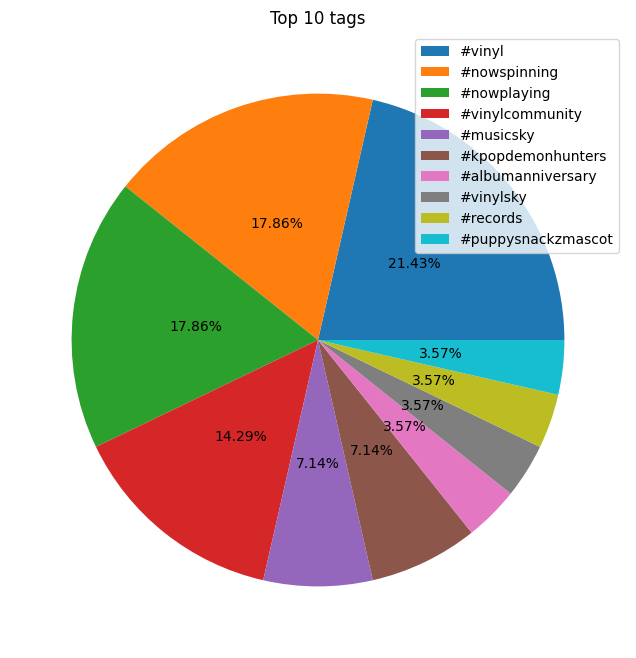

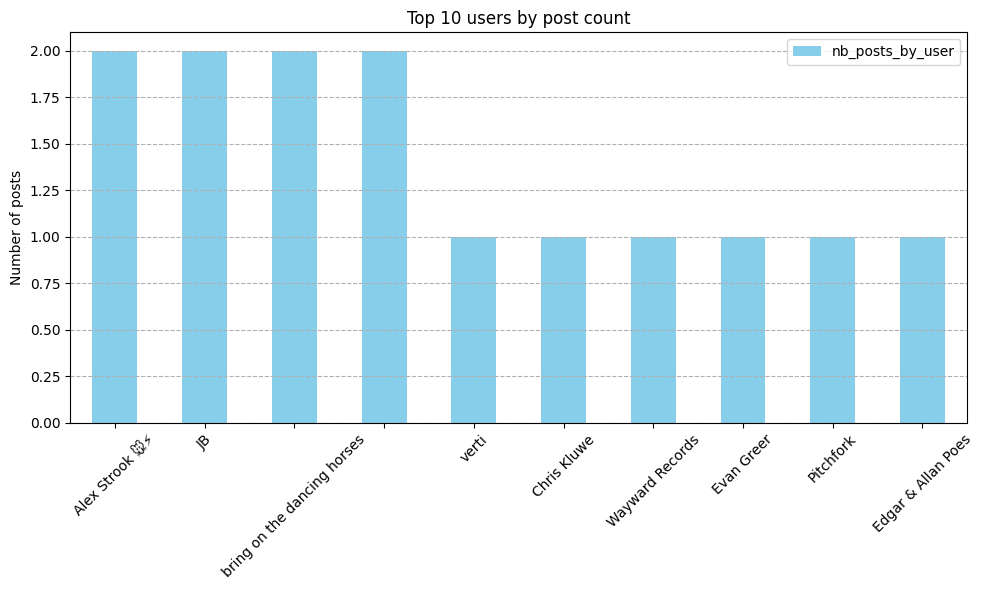

In [25]:
#############################################################################
#                                                                           #
# 2. Top 10 tags and users based on their number of posts in your data set: #
# Functions : get_top_tags, get_top_users_most_posts, df_top_tags_users     #
#                                                                           #
#############################################################################

"""
Function: get_top_tags

Finds and ranks the n most frequently used tags.
We exclude the the top one, as it is the query tag and would not give any more new information on the posts.

Parameters:
* df: Pandas DataFrame of posts
* n: Number of tags to return 

Returns:
* top_tags: List of (tag_name, tag_count) tuples
"""
def get_top_tags(df,n=10):
    # find the top 10 tags from the data set, except #football:
    all_tags = df['text'].apply(lambda text: re.findall(r"#\w+", text.lower()))
    all_tags = [tag for sublist in all_tags for tag in sublist]
    
    # Count frequency
    tag_counts = Counter(all_tags)

    # remove the top count, it is the tag we used a as common subject for all the posts in the fetched data
    remv_tag, _ = tag_counts.most_common(1)[0]
    del tag_counts[remv_tag]

    # take only the n firsts
    top_tags = tag_counts.most_common(n)
    return top_tags


"""
Function: get_top_users_most_posts

Finds and ranks the n users most frequently posting.

Parameters:
* df: Pandas DataFrame of posts
* n: Number of users to return 

Returns:
* Pandas Series of top users
"""
def get_top_users_most_posts(df,n=10): 
    # find the top n users from the data set with the most posts
    return df['author'].value_counts().head(n)



"""
Function: df_top_tags_users

Creates a DataFrame for the top users and tags.

Parameters:
* df: Pandas DataFrame of posts
* n: Number of top users/tags

Returns:
* top_data: Combined DataFrame of top tags and top users

"""
def df_top_tags_users(df,n=10):

    # init top tags and users
    top_tags = get_top_tags(df)
    top_users = get_top_users_most_posts(df)
    
    # Create two separate DataFrames
    df_top_tags = pd.DataFrame(top_tags, columns=["tag", "nb_tags"])
    
    df_top_users = top_users.reset_index()
    df_top_users.columns = ["user", "nb_posts_by_user"]
    
    # Combine into one DataFrame (for display purposes)
    top_data = pd.concat([df_top_users, df_top_tags], axis=1)
        
    return top_data, df_top_users, df_top_tags


def plot_top_tag_users(df_top_users, df_top_tags, n=10):
    # Pie chart for top tags
    tags = df_top_tags['tag']
    counts = df_top_tags['nb_tags']
    
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    ax1.pie(counts, labels=None, autopct=lambda pct: f"{round(pct, 2)}%", pctdistance=0.5, labeldistance=1.3)
    ax1.set_title(f"Top {n} tags")
    ax1.legend(tags, loc='best')
    
    # Bar chart for top users
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    df_top_users.plot(kind='bar', x='user', y='nb_posts_by_user', color='skyblue', ax=ax2)
    ax2.set_title(f"Top {n} users by post count")
    ax2.set_ylabel("Number of posts")
    ax2.set_xlabel("")
    ax2.grid(True, axis='y', linestyle='--')
    plt.xticks(rotation=45)
    plt.tight_layout()

    return fig1, fig2
    

""" test """

df_top, df_top_users, df_top_tags = df_top_tags_users(df_posts,10)

fig1_top,fig2_top = plot_top_tag_users(df_top_users, df_top_tags)

df_top

In [26]:
##################################################################################
#                                                                                #
# 3. Get the followers of a given social media user from your acquired data set: #
# Functions : get_top_user, getFollowers                                         # 
#                                                                                #  
##################################################################################

"""
Function: getFollowers

Fetches a limited list of followers for a given user.

Link documentation : https://docs.bsky.app/docs/api/app-bsky-graph-get-followers

Parameters:
* client: Bluesky session object
* user_did: Unique identifier for the user
* df: DataFrame containing post and author info
* limit : Maximum number of followers to fetch within the range [1,100]

Returns:
* followers: List of follower objects
"""
def getFollowers(client,user_did,df,limit=50):
    
    # Fetch followers
    response = client.app.bsky.graph.get_followers({'actor': user_did,'limit': limit})
    
    # Extract follower information
    followers = response.followers

    following_name = (df[df['author_did'] == user_did])['author'].iloc[0]
     
    # Display follower author names:
    print(f"Followers of {following_name} :")
        
    countFollowers=0
    for countFollowers,follower in enumerate(followers):
        print(f"{countFollowers} : {follower.display_name or follower.handle}") 
        # some users do not have displayed name. In that case, print their handle.
    print(f"Total count of followers = {countFollowers+1}")
    
    return followers


"""
Function: get_top_user

Retrieves from the Top users DataFrame, the user that has the most posts in our intial dataset.

Parameters:
* df_posts: DataFrame containing posts information
* df_top: DataFrame containing the top users information

Returns:
* Unique identifier of the top user
"""
def get_top_user(df_posts, df_top):
    top_user_name = df_top['user'].iloc[0] # find the top users name in the top users dataframe, make sure it is valid
    return df_posts.loc[df_posts['author'] == top_user_name, 'author_did'].iloc[0] 



""" test """

top_user_did = get_top_user(df_posts, df_top)
top_user_followers = getFollowers(client,top_user_did,df_posts,100)


Followers of Alex Strook 🐭⚡️ :
0 : thedr1ven1@
1 : Dvl_Brd
2 : GameDevAdam
3 : Tom Smothers
4 : sublexical
5 : zyadyy.bsky.social
6 : The Deal Fairy
7 : Leaf N Branch 🦋 💙 🌎🌕🌈🛸🎼🌲☘️🧘🏼
8 : eddie
9 : Dare
10 : Cooper
11 : leftcoastray
12 : dundeebeach
13 : Raquel 
14 : GeesBees🐝♀️💪🌻🦋
15 : O'BrienP 💙
16 : Joan Henry
17 : Suz Eaton
18 : Tim in Maryland
19 : [ PERCY ]
20 : Beez
21 : zeoy43.bsky.social
22 : The Good Donald
23 : bridg2et.bsky.social
24 : Gamedev Bram 🎁
25 : (mtf) Jessie(trans mama🏳️‍🌈🏳️‍⚧️)
26 : Daniel
27 : zebralıkhojturzebraolun
28 : larrysart.bsky.social
29 : SmallStoneRecords
30 : Obvious_Dev | Pascal
31 : François - Frozax Games
32 : brainey-cobra.bsky.social
33 : sapiens365.bsky.social
34 : BerryWaffles🇺🇸❤️🤍💙
35 : phiidev (real)
36 : Pat Coughlin
37 : forfoxsocks.bsky.social
38 : Hyphinett
39 : Mountain & Myth Fantasy Cartography
40 : Sharp Designs - Custom Apparel
41 : Fleur 🏳️‍⚧️
42 : gurt
43 : zeb yeen / lex bat 🍪🦇
44 : Donut
45 : Turanome
46 : imageflystudio.bsky.soci

In [27]:
#########################################################################################################
#                                                                                                       #
# 4. Given a social media user, obtain the posts and profiles of all followers of the user and show it: #
# Functions : get_profile, get_recent_posts, df_followers, df_followers_post                            #
#                                                                                                       #  
#########################################################################################################


"""
Function get_profile: 

Send API request to fetch detailed profile view of an actor and its metadata.

Parameters:
* client: Bluesky session object
* user_did: Unique identifier for the user

Returns:
* Detailed profile view of an actor
"""
# function to get profile of a user
def get_profile(client, user_did):
    return client.app.bsky.actor.get_profile({'actor': user_did})



"""
Function get_recent_posts: 

.

Parameters:
* :

Returns:
* :
"""
# function to get recent posts of a user, max limit is 5
def get_recent_posts(client, user_did, limit=5):
    response = client.app.bsky.feed.get_author_feed({'actor': user_did, 'limit': limit})
    return response.feed



"""
Function df_followers: 

.

Parameters:
* :

Returns:
* :
"""
# add a list to store follower information, then transform into df
def df_followers(client, followers, limit=5):

    follower_data = []
    
    for follower in followers:
        follower_did = follower.did
        profile = get_profile(client,follower_did)
        posts = get_recent_posts(client,follower_did, limit=5)
        
        follower_info = {
            'display_name': profile.display_name,
            'handle': profile.handle,
            'avatar_url': profile.avatar,
            'description': profile.description,
            'followers_count': profile.followers_count,
            'following_count': profile.follows_count,
            'posts_count': profile.posts_count,
        }
        
        follower_data.append(follower_info)
    
    # create a DataFrame
    df_followers = pd.DataFrame(follower_data)

    return df_followers



"""
Function df_followers_post: 

Fetch recent post DIDs for each follower and return a DataFrame containing display name,
handle, DID, and a list of their post DIDs.

Parameters: 
* client: Bluesky session object
* followers: List of follower objects (each with a 'did' attribute)
* limit: Max number of posts to retrieve per follower (default: 5)

Returns:
* pandas.DataFrame with columns: display_name, handle, did, post_dids
"""
def df_followers_post(client, followers, limit=5):
    data = []

    for follower in followers:
        follower_did = follower.did
        profile = get_profile(client, follower_did)
        posts = get_recent_posts(client, follower_did, limit=limit)

        post_uris = [
            post.post.uri
            for post in posts
            if hasattr(post, 'post') and hasattr(post.post, 'uri')
        ]

        data.append({
            'display_name': profile.display_name,
            'handle': profile.handle,
            'author_did': follower_did,
            'post_dids': post_uris if len(post_uris) > 0 else None
        })

    df = pd.DataFrame(data)
    return df



    
""" Test """

df_top_user_followers = df_followers(client, top_user_followers)

df_top_user_followers


,display_name,handle,avatar_url,description,followers_count,following_count,posts_count
0,thedr1ven1@,thedr1ven1.bsky.social,https://cdn.bsky.app/img/avatar/plain/did:plc:...,NO DMs,2423,8807,4
1,Dvl_Brd,dvl-brd.bsky.social,https://cdn.bsky.app/img/avatar/plain/did:plc:...,"Claws, Cats, Cars, Crafts. All sorts of things...",124,246,295
2,GameDevAdam,gamedevadam.bsky.social,https://cdn.bsky.app/img/avatar/plain/did:plc:...,Hobbyist game dev that streams here: https://w...,44,90,102
3,Tom Smothers,tsmothers.bsky.social,https://cdn.bsky.app/img/avatar/plain/did:plc:...,Retired Dude,3062,4443,2276
4,sublexical,sublexical.net,https://cdn.bsky.app/img/avatar/plain/did:plc:...,🇨🇦 indie #gamedev making It Consumes - an aren...,2742,575,188
...,...,...,...,...,...,...,...
94,cat 🏳️‍⚧️,catball.bsky.social,https://cdn.bsky.app/img/avatar/plain/did:plc:...,she/her,177,251,147
95,Zockeromi,zockeromi.bsky.social,https://cdn.bsky.app/img/avatar/plain/did:plc:...,"Indie and retro games, she/her YT: Zocker Omi,...",437,556,799
96,con,lampoilropebombs.bsky.social,https://cdn.bsky.app/img/avatar/plain/did:plc:...,None,62,150,10
97,bean baguette,thebeanbaguette.bsky.social,https://cdn.bsky.app/img/avatar/plain/did:plc:...,"Illustrator, Felter & Cartoonist, \nFantasy Ne...",2044,435,280


In [28]:
""" follow up test """

df_top_user_followers_post = df_followers_post(client, top_user_followers)

df_top_user_followers_post

,display_name,handle,author_did,post_dids
0,thedr1ven1@,thedr1ven1.bsky.social,did:plc:d7u5gpx7r5g36yyn26juhxrc,[at://did:plc:s3m33wvdsixxr2ifnkldlfp3/app.bsk...
1,Dvl_Brd,dvl-brd.bsky.social,did:plc:iwu4y7yoxybb7tzaoqlk52mo,[at://did:plc:iwu4y7yoxybb7tzaoqlk52mo/app.bsk...
2,GameDevAdam,gamedevadam.bsky.social,did:plc:gykbwjsnoy7jne7ctv6er6b7,[at://did:plc:iuha5tn7bmd3pbnlptc6tehm/app.bsk...
3,Tom Smothers,tsmothers.bsky.social,did:plc:sz4crpthw2qabwf2tpci3e2o,[at://did:plc:x4g4laxkmsrczwvnvbbgsm7g/app.bsk...
4,sublexical,sublexical.net,did:plc:mpucnsenrkarpola4yplm747,[at://did:plc:knybgc4siigl22kc5t4new4w/app.bsk...
...,...,...,...,...
94,cat 🏳️‍⚧️,catball.bsky.social,did:plc:6eah4n7nex5reaixhswz7xxf,[at://did:plc:6eah4n7nex5reaixhswz7xxf/app.bsk...
95,Zockeromi,zockeromi.bsky.social,did:plc:hmd3ytngsjxltmnwltvj66va,[at://did:plc:hmd3ytngsjxltmnwltvj66va/app.bsk...
96,con,lampoilropebombs.bsky.social,did:plc:b5uarcvyt4u3gjbf6xdapgdm,[at://did:plc:b5uarcvyt4u3gjbf6xdapgdm/app.bsk...
97,bean baguette,thebeanbaguette.bsky.social,did:plc:2ogb3xkmquasxfq44tmqslqu,[at://did:plc:2ogb3xkmquasxfq44tmqslqu/app.bsk...


In [29]:
#########################################################################################################
#                                                                                                       #
# Export data                                                                                           #
# Functions : main                                                                                      #
#                                                                                                       #  
#########################################################################################################

def main():

    try:
        # Create a directory if it does not exist yet to export the data
        dir_name = f"res_{query}_{untilTime}"
        makedirs(dir_name, exist_ok=True)
        makedirs(dir_name+"/csv", exist_ok=True)
        makedirs(dir_name+"/png", exist_ok=True)
    
        # DataFrames -> .csv files
        df_posts.to_csv(f"{dir_name}/csv/output_posts.csv", index=False)
        df_posts_sentiment.to_csv(f"{dir_name}/csv/output_posts_sentiment.csv", index=False)
        df_top.to_csv(f"{dir_name}/csv/output_top_tags_users.csv", index=False)
        df_top_user_followers.to_csv(f"{dir_name}/csv/output_top_user_followers.csv", index=False)
        df_top_user_followers_post.to_csv(f"{dir_name}/csv/output_top_user_followers_posts.csv", index=False)
    
        fig1_sent.savefig(f"{dir_name}/png/fig1_sent.png", bbox_inches='tight')
        fig2_sent.savefig(f"{dir_name}/png/fig2_sent.png", bbox_inches='tight')
        fig1_top.savefig(f"{dir_name}/png/fig1_top.png", bbox_inches='tight')
        fig2_top.savefig(f"{dir_name}/png/fig2_top.png", bbox_inches='tight')
        print("Succesful files exportation")
    except Exception as e:
        print("Error: ",e)


main()

# add in report : makedirs, datetime module, add function get_top_user, Basic date and time types.

Succesful files exportation
